# 22. Cluster stations based on week-weekend distribution of travelers (hint: consider rescaling).Do you observe similar clusters to the ones observed with regard to facilities-based clustering?

In [16]:
%cd ..

/Users/maxwang/PycharmProjects


In [17]:
#import libraries 
from data_processing import data
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [18]:
col_list= ['saturday', 'sunday']
# sum specific columns
data.travelers['weekend'] = data.travelers[col_list].sum(axis=1)

In [19]:
data.travelers.head(5)

,Unnamed: 0,Station,week,saturday,sunday,sum,weekend
0,0,aalst,6444.0,1768.0,1592.0,9804.0,3360.0
1,1,aalst-kerrebroek,27.0,0.0,0.0,NaN,0.0
2,2,aalter,2288.0,1055.0,855.0,4198.0,1910.0
3,3,aarschot,6270.0,1954.0,1395.0,9619.0,3349.0
4,4,aarsele,34.0,0.0,0.0,NaN,0.0


,Unnamed: 0,Station,week,saturday,sunday,sum,weekend
0,0,aalst,0.792984,1768.0,1592.0,9804.0,3360.0
1,1,aalst-kerrebroek,-0.272965,0.0,0.0,NaN,0.0
2,2,aalter,0.102617,1055.0,855.0,4198.0,1910.0
3,3,aarschot,0.764080,1954.0,1395.0,9619.0,3349.0
4,4,aarsele,-0.271802,0.0,0.0,NaN,0.0


In [20]:
data.travelers["week"] = data.travelers["week"].astype(int)

In [21]:
data.travelers["weekend"] = data.travelers["weekend"].astype(int)

In [22]:
data.travelers["weekend"]

0      3360
1         0
2      1910
3      3349
4         0
       ... 
548     184
549      75
550      48
551    1917
552      87
Name: weekend, Length: 553, dtype: int64

0      3360
1         0
2      1910
3      3349
4         0
       ... 
548     184
549      75
550      48
551    1917
552      87
Name: weekend, Length: 553, dtype: int64

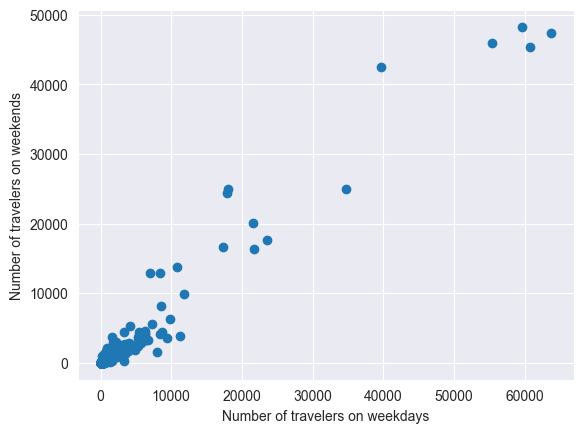

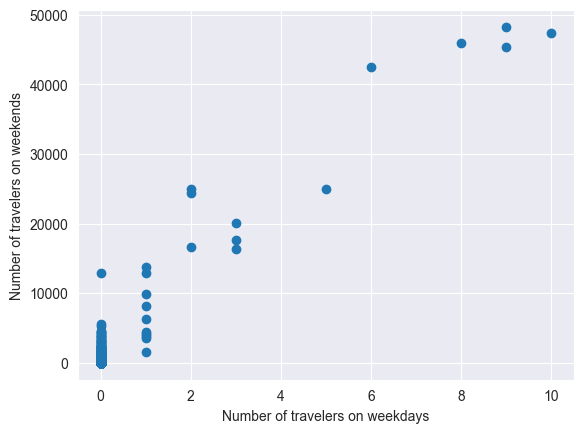

In [23]:
# plot data
plt.scatter(data.travelers["week"], data.travelers["weekend"])
plt.xlabel('Number of travelers on weekdays')
plt.ylabel('Number of travelers on weekends')
plt.show()

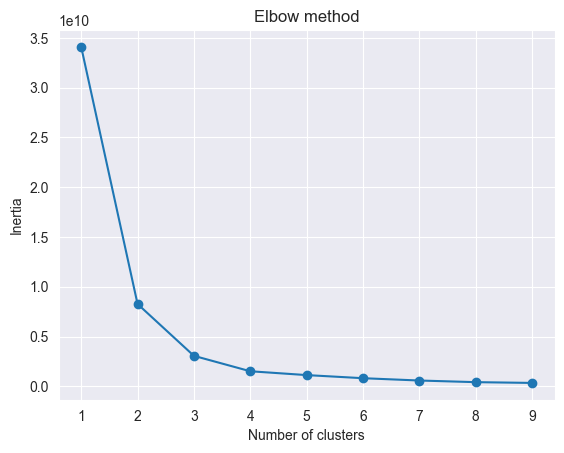

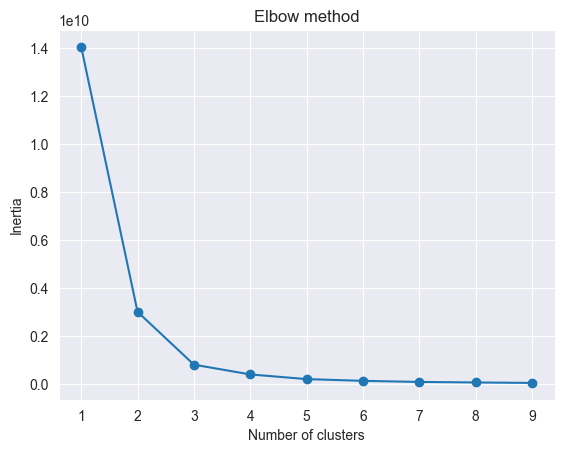

In [24]:
# using Elbow method to find the optimal number of clusters 
inertias = []

for i in range(1,10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data.travelers[["week","weekend"]])
    inertias.append(kmeans.inertia_)

plt.plot(range(1,10), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

so the optimal number of cluster is 2 

In [25]:
# now we do rescaling 
# define scaler
scaler = StandardScaler()

# fit scaler on MonthlyCharges and TotalCharges
scaler.fit(data.travelers[["week", "weekend"]])

# apply scaler on MonthlyCharges and TotalCharges
data.travelers[["week",  "weekend"]] = scaler.transform(data.travelers[["week", "weekend"]])

In [26]:
# inspect
data.travelers[["week",  "weekend"]].describe()

,week,weekend
count,5.530000e+02,5.530000e+02
mean,1.927331e-17,-3.212219e-18
std,1.000905e+00,1.000905e+00
min,-2.774500e-01,-2.529347e-01
25%,-2.545264e-01,-2.430127e-01
50%,-2.231310e-01,-2.192000e-01
75%,-1.327654e-01,-1.568901e-01
max,1.031709e+01,9.325133e+00


,week,weekend
count,5.530000e+02,5.530000e+02
mean,-2.569775e-17,-3.212219e-18
std,1.000905e+00,1.000905e+00
min,-1.482335e-01,-2.529347e-01
25%,-1.482335e-01,-2.430127e-01
50%,-1.482335e-01,-2.192000e-01
75%,-1.482335e-01,-1.568901e-01
max,1.123692e+01,9.325133e+00


In [27]:
# initialize the cluster algorithm with 2 classes
kmeans_model = KMeans(n_clusters=2)

In [28]:
# fit the kmeans model onto the data
kmeans_model.fit(data.travelers[["week","weekend"]])

KMeans(n_clusters=2)

KMeans(n_clusters=2)

In [29]:
# inspect the labels
kmeans_model.labels_[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

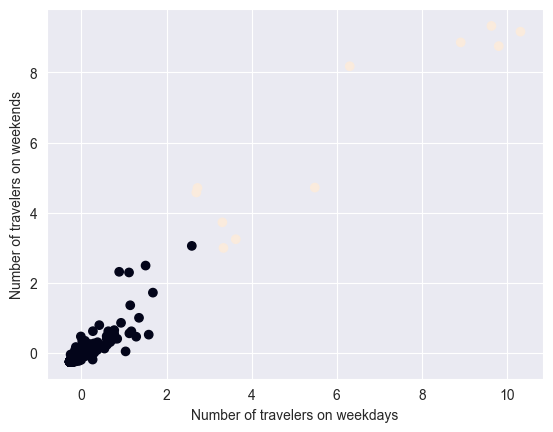

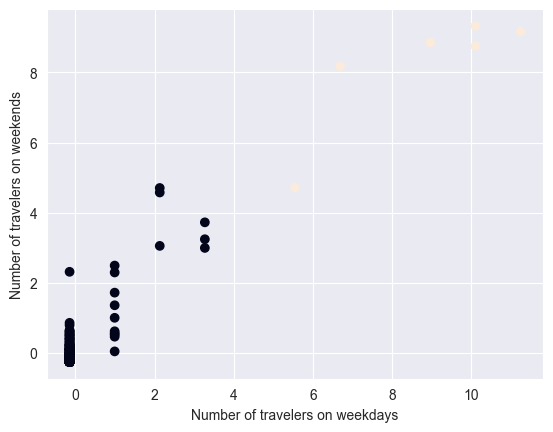

In [30]:
plt.scatter(data.travelers["week"], data.travelers["weekend"], c=kmeans_model.labels_)
#ax = plt.axes()
#ax.set_facecolor("black")
plt.xlabel('Number of travelers on weekdays')
plt.ylabel('Number of travelers on weekends')
plt.show()